EDA ON SOUND 8K

In [57]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd

##### Some facts about librosa
1. It takes care of mono and stereo files.
2. It takes care of sampling rate.(22050)
3. returns normalized ndarray


In [58]:
filename = '344-3-4-0.wav'

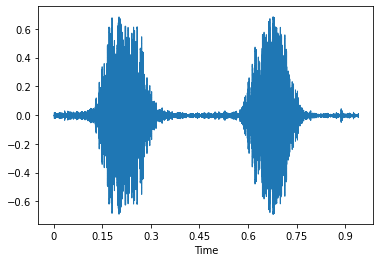

In [59]:
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

current;y we are getting a sample rate of 22050 Hz, but the standard for audio is 44100 Hz.


In [60]:
sample_rate

22050

In [61]:
data

array([-0.00274324, -0.00226056, -0.00111446, ...,  0.00106908,
        0.00128053,  0.00225282], dtype=float32)

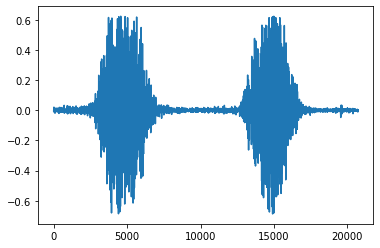

In [62]:
plt.plot(data)

#### Getting the dataset metadata

In [63]:
import pandas as pd
metadata = pd.read_csv('UrbanSound8K.csv')

In [64]:
## checking for balanced data
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

Now we will extract features from files and store them in a pandas dataframe. using MFCC

In [65]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type = 'kaiser_fast')
    mfcc_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_features.T, axis=0)
    return mfcc_scaled_features

In [66]:
# from tqdm import tqdm
# import os
# ### Now we iterate through every audio file and extract features 
# ### using Mel-Frequency Cepstral Coefficients
# extracted_features=[]
# for index_num,row in tqdm(metadata.iterrows()):
#     file_name = os.path.join(os.path.abspath(r"E:\DATA SETS\UrbanSound8K\UrbanSound8K\audio"),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
#     final_class_labels=row["class"]
#     data=features_extractor(file_name)
#     extracted_features.append([data,final_class_labels])
#     extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
# extracted_features_df.head()

In [67]:
extracted_features_df = pd.read_csv('extracted_features_df.csv')
# extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,[-2.1818938e+02 7.1385490e+01 -1.3149442e+02 ...,dog_bark
1,[-4.25052338e+02 1.10670952e+02 -5.41928329e+...,children_playing
2,[-4.5982623e+02 1.2282864e+02 -4.7908062e+01 ...,children_playing
3,[-4.1482184e+02 1.0294826e+02 -3.6656849e+01 ...,children_playing
4,[-4.4760776e+02 1.1508627e+02 -5.3746071e+01 ...,children_playing


##### We will save the data for futher use

In [68]:
# pd.DataFrame(extracted_features_df).to_csv('extracted_features_df.csv',index=False)

In [69]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [70]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))


In [71]:
X

array(['[-2.1818938e+02  7.1385490e+01 -1.3149442e+02 -5.2258919e+01\n -2.2106579e+01 -2.1909658e+01 -1.1460048e+01  1.8722719e+01\n  6.4100842e+00  1.4377757e+01 -1.2035480e+01  1.9690273e+00\n -1.7309101e+01  9.7747097e+00 -5.8458338e+00 -1.5289919e+00\n -1.7429775e+01  1.0425419e+00 -4.1709466e+00  7.3335233e+00\n -1.1701520e+01 -7.4281230e+00  5.4550538e+00 -2.9434779e+00\n -5.9815211e+00 -2.3365967e-01 -3.4048653e+00  4.3616672e+00\n -6.0568323e+00 -5.6260581e+00  1.0876638e+00  6.8657203e+00\n -2.0219433e-01  1.6815264e+00 -5.6556253e+00 -2.8866241e+00\n  3.0454183e+00 -1.5696381e+00 -7.5472176e-01  5.3398448e-01]',
       '[-4.25052338e+02  1.10670952e+02 -5.41928329e+01  6.20454140e+01\n -8.09496641e-01  1.82500648e+01  1.37091815e+00  1.12450905e+01\n -1.72693193e+00  1.24300308e+01 -1.11215639e+01  2.07905788e+01\n -9.02145004e+00  1.28912430e+01  5.40408790e-01  6.26082611e+00\n -2.09127045e+00  1.03137369e+01 -5.21144772e+00  5.77518511e+00\n -1.80003369e+00  7.70589113e+00

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
num_labels=y.shape[1]

In [81]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(32,40)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [82]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32, 100)           4100      
                                                                 
 activation_24 (Activation)  (None, 32, 100)           0         
                                                                 
 dropout_18 (Dropout)        (None, 32, 100)           0         
                                                                 
 dense_26 (Dense)            (None, 32, 200)           20200     
                                                                 
 activation_25 (Activation)  (None, 32, 200)           0         
                                                                 
 dropout_19 (Dropout)        (None, 32, 200)           0         
                                                                 
 dense_27 (Dense)            (None, 32, 100)          

In [83]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [84]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

# checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
#                                verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\pwayk\anaconda3\envs\audio\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\pwayk\anaconda3\envs\audio\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\pwayk\anaconda3\envs\audio\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\pwayk\anaconda3\envs\audio\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\pwayk\anaconda3\envs\audio\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\pwayk\anaconda3\envs\audio\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_7" (type Sequential).
    
    Input 0 of layer "dense_25" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_7" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=True
      • mask=None


In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7452776432037354


In [ ]:
model.predict(X_test)

55/55 [==============================] - 8s 4ms/step


array([[2.21163686e-03, 2.28138175e-03, 2.04374231e-02, ...,
        8.57933955e-08, 1.56136474e-03, 2.99796686e-02],
       [3.64620246e-05, 2.99224188e-03, 5.35698002e-03, ...,
        2.26388129e-05, 1.85166094e-02, 2.29486302e-02],
       [4.23049351e-05, 1.51440995e-02, 7.68544152e-04, ...,
        5.08286119e-01, 1.25674895e-04, 1.07228626e-02],
       ...,
       [8.19892648e-07, 6.84015334e-01, 2.95209229e-05, ...,
        3.18679731e-08, 9.92362693e-05, 3.11718404e-01],
       [1.79261863e-01, 1.09608555e-02, 3.19614917e-01, ...,
        1.93519238e-02, 2.27740109e-02, 2.63099819e-01],
       [6.02661334e-02, 1.73930656e-02, 2.91294307e-01, ...,
        3.71944479e-04, 7.00393617e-02, 2.18443751e-01]], dtype=float32)

In [ ]:
Y = extracted_features_df['class'].unique().tolist()

In [ ]:
filename="344-3-4-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
labelencoder.fit(Y)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class 

[-2.6977017e+02  1.3238858e+02  2.4949071e+00 -1.4897638e+01
 -4.5520840e+01  8.5442514e+00 -2.3441055e+01 -2.0223001e+01
 -2.5094149e+01 -8.8268957e+00 -1.0620856e+00  1.2199959e+00
 -3.0501487e+00 -3.3334835e+00 -1.3199317e+00  5.8557963e+00
  2.9053205e-01 -6.4423923e+00 -4.9864984e+00 -2.2928913e+00
 -9.8934889e+00 -6.4396777e+00 -7.5701928e+00 -4.5171719e+00
 -2.4011128e+00  6.1073142e-01  1.1739403e+00 -1.3563875e+00
 -8.4628928e-01  3.0036786e+00 -3.4504253e-01 -3.5317285e+00
 -1.4872164e+00  1.0998499e+00 -4.6461616e-02 -2.2416255e+00
 -2.3780553e+00 -2.3726897e+00 -2.3863044e+00 -8.3910900e-01]
[[-2.6977017e+02  1.3238858e+02  2.4949071e+00 -1.4897638e+01
  -4.5520840e+01  8.5442514e+00 -2.3441055e+01 -2.0223001e+01
  -2.5094149e+01 -8.8268957e+00 -1.0620856e+00  1.2199959e+00
  -3.0501487e+00 -3.3334835e+00 -1.3199317e+00  5.8557963e+00
   2.9053205e-01 -6.4423923e+00 -4.9864984e+00 -2.2928913e+00
  -9.8934889e+00 -6.4396777e+00 -7.5701928e+00 -4.5171719e+00
  -2.4011128e+00 

ValueError: y should be a 1d array, got an array of shape (1, 10) instead.